In [102]:
import pandas as pd
import numpy as np
import sys
data=pd.read_excel('User_embedding.xlsx',sheet_name='sheet1')

In [105]:
data=data.drop_duplicates()
data=data.reset_index().drop('index',axis=1)
data=data.fillna('')

In [106]:
data

,username,name,tweet,hashtags,bio,Jobs,embed
0,GiGiHadid,Gigi Hadid,"['few things 😋🙃😘', 'You were facing the right ...",giforce,IMG Models Worldwide. #giforce,model,['model']
1,Cantguardmike,Michael William Thomas Jr.,"['Facts !', '@jhardee_19 called it like 2 mont...",gobucks,GOD GOT US,football wide receiver,['receiver']
2,IAMJHUD,Jennifer Hudson,"['Team JHud, please help me wish my Virgo sist...","neverforget,baobabstudios,respectmovie,ebony,v...","Grammy winning Artist, Academy Award winning A...","singer , actress","['singer', 'actress']"
3,lukajones,Luka Jones,"['@johnnypemberton Here we go 🏈', 'gracias for...","goclippers,rcjh,topcity,goblue,rcjh",actor (Shrill & People of Earth both on @hulu)...,"actor , comedian","['actor', 'comedian']"
4,rcobb18,Randall Cobb (American football),['Man It Feels Good to Be a Packer https://t....,"mvp,ad,winitforted,jerseyswap,verzuz,ad,jersey...",Faith in the Creator of Life. Husband. Father....,football wide receiver,['receiver']
...,...,...,...,...,...,...,...
1317,ColinHanks,Colin Hanks,['@PFTompkins The old man has a pretty sweet c...,"hankskerchiefs,hankskerchiefs,beready,beready,tbt",,"actor , producer , director","['actor', 'producer']"
1318,CraigyFerg,Craig Ferguson,['Tonight! @TheHustlerABC @ABCNetwork #thecrai...,"thecraigfergusonshow,thecraigfergusonshow,theh...",,"actor , author , comedian , television host","['actor', 'author']"
1319,GeraldFinley,Gerald Finley,['@Twiz007 @DonaldMacleod01 @juliusdrake @edin...,"bluebeardscastle,otello,otello,dongiovanni,don...",,baritone opera singer,['singer']
1320,Emily_Estefan,Emily Estefan,['Just posted a photo https://t.co/ck0baQ3egI...,"damnitnova,davenavarro,imissmyband,purplemoney...",,singer,['singer']


In [5]:
def return_txt(text):
    r=text[2:-2].rsplit("'")
    if len(r)>1:
        r.pop(1)
    else:
        pass
    
    return ' '.join(r)

In [143]:
data['main_Job']=data['embed'].apply(return_txt)
data['main_Job']=data['main_Job'].str.replace('receiver','footballer')
data[['name','main_Job']].sample(5)

,name,main_Job
253,Teyana Taylor,singer-songwriter actress
768,Lebron James,basketball
719,Brandon Woelfel,photographer
1216,Gareth Bale,footballer
516,Hart Hanson,writer producer


In [113]:
def extract_vectors(dataframe, column,n=2):     
        #Approach: Sum of vectors for n words
        #Add Glove embeddings
        gloveFile = "glove.6B.100d.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        
        # Unique words
        unique = list(dataframe[column].str.split(' ', expand=True).stack().unique())
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')

        #Sum of Glove vectors for n words
        from operator import add
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            sum_word_vec = [0]*100
            for word in row[column].split(' '):
                word_vec = unique_word_vec[word]
                sum_word_vec = list(map(add, sum_word_vec, word_vec))
            stack.extend([sum_word_vec])
        stack=pd.DataFrame(stack)
        
        cluster_dataset = dataframe[[column]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset

In [111]:
cluster_dataset = extract_vectors(data,column='main_Job')

In [112]:
cluster_dataset

,main_Job,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,model,-0.276630,0.550940,0.136180,0.596830,-0.24868,-0.343110,0.746600,0.127180,-0.288190,...,0.164410,0.212450,0.40468,-0.358040,0.482790,-0.11034,-0.811010,-0.63821,1.028400,0.053952
1,footballer,0.336230,-0.267630,0.261060,-0.678170,-0.31801,0.901620,0.041388,-1.340500,-0.538160,...,-0.638590,0.266030,-0.72848,0.478430,-0.295880,0.98647,-1.441600,0.44159,0.091122,-1.397200
2,singer actress,0.773337,-0.063219,0.246627,-0.314056,1.09588,0.311930,-0.189378,-0.459106,-0.130247,...,0.329708,-0.214570,-0.04791,0.246510,-0.177124,1.41833,-1.714470,-0.44751,0.073884,-0.033080
3,actor comedian,0.304490,0.552080,0.186207,-1.382300,0.69041,-0.216141,-1.008390,-0.786510,-0.771010,...,0.102396,-0.445534,0.01080,0.498380,-0.086333,1.47217,-0.045807,-0.68310,0.405210,-0.783150
4,footballer,0.336230,-0.267630,0.261060,-0.678170,-0.31801,0.901620,0.041388,-1.340500,-0.538160,...,-0.638590,0.266030,-0.72848,0.478430,-0.295880,0.98647,-1.441600,0.44159,0.091122,-1.397200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,actor producer,0.954700,0.376527,0.598530,-1.299870,1.41949,-1.780040,-0.534663,-0.661132,-0.852500,...,0.371876,-0.651410,-0.08576,0.172255,-0.486705,1.51377,0.155313,-0.70762,0.712740,-0.890160
1318,actor author,0.047630,0.650620,0.241441,-0.540049,1.29548,0.128150,-0.440910,-1.805410,-0.947840,...,0.446416,-0.216620,0.99270,0.137293,-0.096525,1.65016,-0.130497,-1.34636,-0.062640,-0.307870
1319,singer,0.085597,0.087591,0.160700,-0.279480,0.68711,0.558960,-0.048218,-0.450240,-0.204330,...,0.046008,-0.024050,-0.34344,0.120280,-0.013304,0.52830,-1.207300,-0.23646,0.006468,-0.259380
1320,singer,0.085597,0.087591,0.160700,-0.279480,0.68711,0.558960,-0.048218,-0.450240,-0.204330,...,0.046008,-0.024050,-0.34344,0.120280,-0.013304,0.52830,-1.207300,-0.23646,0.006468,-0.259380


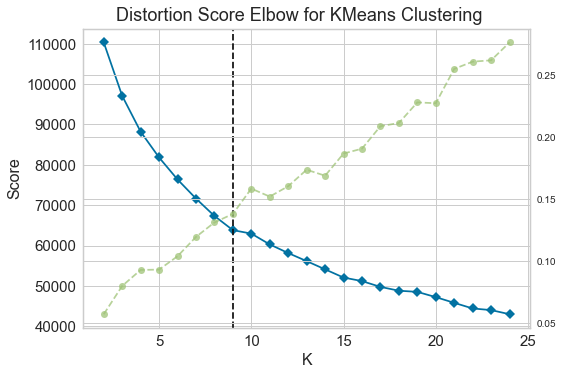

In [114]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import matplotlib.pyplot as plt 
from yellowbrick.cluster import KElbowVisualizer


sc_X = StandardScaler()
X_train = sc_X.fit_transform(cluster_dataset.iloc[:,1:])
# Instantiate the clustering model and visualizer
model = KMeans( init = 'k-means++', random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,25))


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

visualizer.fit(X_train)# Fit the data to the visualizer  

visualizer.ax.set_ylabel("Score",fontsize = 16)
visualizer.ax.set_xlabel("K",fontsize = 16)

plt.figtext(.5,.9,'Distortion Score Elbow for KMeans Clustering', fontsize=18, ha='center')
plt.show()   

In [111]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

data['CLUSTERS'] = kmeans.labels_

In [112]:
data

,username,name,tweet,hashtags,Jobs,embed,bio,main_Job,CLUSTERS
0,GiGiHadid,Gigi Hadid,"['few things 😋🙃😘', 'You were facing the right ...",giforce,model,['model'],IMG Models Worldwide. #giforce,model,2
1,Cantguardmike,Michael William Thomas Jr.,"['Facts !', '@jhardee_19 called it like 2 mont...",gobucks,football wide receiver,['receiver'],GOD GOT US,footballer,3
2,IAMJHUD,Jennifer Hudson,"['Team JHud, please help me wish my Virgo sist...","neverforget,baobabstudios,respectmovie,ebony,v...","singer , actress","['singer', 'actress']","Grammy winning Artist, Academy Award winning A...",singer actress,4
3,lukajones,Luka Jones,"['@johnnypemberton Here we go 🏈', 'gracias for...","goclippers,rcjh,topcity,goblue,rcjh","actor , comedian","['actor', 'comedian']",actor (Shrill & People of Earth both on @hulu)...,actor comedian,6
4,rcobb18,Randall Cobb (American football),['Man It Feels Good to Be a Packer https://t....,"mvp,ad,winitforted,jerseyswap,verzuz,ad,jersey...",football wide receiver,['receiver'],Faith in the Creator of Life. Husband. Father....,footballer,3
...,...,...,...,...,...,...,...,...,...
1309,ColinHanks,Colin Hanks,['@PFTompkins The old man has a pretty sweet c...,"hankskerchiefs,hankskerchiefs,beready,beready,tbt","actor , producer , director","['actor', 'producer']",,actor producer,6
1310,CraigyFerg,Craig Ferguson,['Tonight! @TheHustlerABC @ABCNetwork #thecrai...,"thecraigfergusonshow,thecraigfergusonshow,theh...","actor , author , comedian , television host","['actor', 'author']",,actor author,1
1311,GeraldFinley,Gerald Finley,['@Twiz007 @DonaldMacleod01 @juliusdrake @edin...,"bluebeardscastle,otello,otello,dongiovanni,don...",baritone opera singer,['singer'],,singer,2
1312,Emily_Estefan,Emily Estefan,['Just posted a photo https://t.co/ck0baQ3egI...,"damnitnova,davenavarro,imissmyband,purplemoney...",singer,['singer'],,singer,2


In [140]:
import emot 
import emojis
import re
emot_obj = emot.core.emot() 
def extract_emojie_mean(text):
    mean=[]
    sel_emoji=[]
    emo_lst=emojis.get(text)
    for item in emo_lst:
        try:
            if emojis.db.get_emoji_by_alias(re.sub(":","",emojis.decode(item))).category in 'Activities':
                sel_emoji.append(item)
        except:
            continue
            
    for item in sel_emoji:
        mean.append(re.sub(":","",emojis.decode(item)))
    
    return re.sub('_',' ',' '.join(mean))


In [139]:
def remove_emoji_1(df,column):
    lst=[]
    for item in data['tweet'].apply(lambda x:list(emojis.get(x))):
        lst.extend(item)
    lst=list(set(lst))
    df['No_emo']=df[column].copy()
    for item in lst:
        data['No_emo']=data['No_emo'].str.replace(item,'')
    return data['No_emo']  

In [123]:
def remove_emoji_2(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(string))

Extract emojis's meaning from tweets

In [128]:
data['emojie']=data['tweet'].apply(extract_emojie_mean)
data['emojie']

0                           sparkles
1                                   
2                           sparkles
3       football baseball basketball
4                           football
                    ...             
1317                                
1318                                
1319                  christmas tree
1320                                
1321             christmas tree tada
Name: emojie, Length: 1322, dtype: object

Removing all the emojis inside tweet and bio

In [129]:
data['No_emojie']=remove_emoji_1(data,'bio').apply(remove_emoji_2)+' '+remove_emoji_1(data,'tweet').apply(remove_emoji_2)

In [130]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from autocorrect import Speller
import itertools
import emoji

def text_cleaner1(text):
    rules = [
        {r'>\s+': u'>'},  # remove spaces after a tag opens or closes
        {r'\s+': u' '},  # replace consecutive spaces
        {r'\s*<br\s*/?>\s*': u'\n'},  # newline after a <br>
        {r'</(div)\s*>\s*': u'\n'},  # newline after </p> and </div> and <h1/>...
        {r'</(p|h\d)\s*>\s*': u'\n\n'},  # newline after </p> and </div> and <h1/>...
        {r'<head>.*<\s*(/head|body)[^>]*>': u''},  # remove <head> to </head>
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},  # show links instead of texts
        {r'[ \t]*<[^<]*?/?>': u''},  # remove remaining tags
        {r'^\s+': u''}  # remove spaces at the beginning
    ]
    for rule in rules:
        for (k, v) in rule.items():
            regex = re.compile(k)
            text = regex.sub(v, text)

    text = text.rstrip()
    text= ''.join(''.join(s)[:2] for _, s in itertools.groupby(text)) #remove similar adjacent character
    BeautifulSoup(text).get_text() # remove http
    text=' '.join(re.sub("(@[A-Za-z0-9]+)", " ", text).split())#remove mentions
    text=re.sub("#[A-Za-z0-9_]+","", text)#removing hashtags
    text = ' '.join(re.sub("(\w+:\/\/\S+)", " ", text).split()) # remove urls
    punc = '''!()-[]{};:'"\|,<>./?@#$%^&*’‘”“_~—•…'''
    for ele in text:
        if ele in punc:
            text= text.replace(ele, "") # remove punctuations.
    text=''.join([i for i in text if not i.isdigit()])

    spell = Speller(lang='en')
    return spell(text)

 

In [131]:
import spacy
import string
def text_cleaner2(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
    text=" ".join([token.lemma_ for token in doc])
    two_let=[]
    stop_words = stopwords.words('english')
    for item1 in list(string.ascii_lowercase):
        for item2 in list(string.ascii_lowercase):
            two_let.append(item1+item2)
    two_let.extend(list(string.ascii_lowercase))
    stop_words.extend(two_let)
    word_tokens = word_tokenize(text.lower())
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

    

merging all the tweets & bios & Emojie's meaning ...

In [133]:
data['tweet_combination']=data['No_emojie']+' '+data['emojie']

In [16]:
data['pre_pro']=data['tweet_combination'].apply(text_cleaner1)
data['pre_pro']=data['pre_pro'].apply(text_cleaner2)
data['pre_pro']

0       IMG Models Worldwide few things  You were faci...
1       OD OT Up Facts    called it like  months ago c...
2       Grammy winning Artist Academy Award winning Ac...
3       actor Thrill  People of Earth both on   philos...
4       Faith in the Creator of Life Husband Father So...
                              ...                        
1309     The old man has a pretty sweet chariot right ...
1310    Tonight Thursday June th season  premieres on ...
1311     If of interest  Ready for Edinburgh  Good mor...
1312    Just posted a photo Just posted a photo TT  Th...
1313     sheer Thank you very much   You need to check...
Name: pre_pro, Length: 1314, dtype: object

In [18]:
data['pre_pro'][2]

'grammy win artist academy award win actress new film respect soon team jud please help wish virgo sister happy birthday year never forget join pray love one lose wow god wow ring quite time always represent day would emmy grammy amp oscar early bday gift limit god story god could write always see try amp hope inspire good receive emmy special project truly icing cake wow thank honor amp incredible creative team bring important story baba laga life grateful opportunity lend voice character executive produce alongside innovative team take back show kid use want snow ball many scoop flavor want hey come cinema friday get ticket yet really oldid shoot hard choose favorite pick one might soon year old rest peace virgo season dream make send love birthday today course see tonight idea spend summer night live music setting like great show dreamgirl never leave happy birthday forever dreamgirl virgo sister love god always give little ask dream mine sing nelson dora full italian never expect p

Listing all the hashtags inside the tweets

In [138]:
lst=[]
for item in data['hashtags']:
    lst.extend(item.rsplit(','))
lst=list(set(lst))
lst.pop(0)
lst

['edfringe',
 'tokyo2020paralympics',
 'votenoontherecall',
 'riplarry',
 'itstheend',
 'worldrefugeeday',
 'hardestworkersintheroom',
 's8er',
 'aboutlastnight',
 'phillydaonpbs',
 'k',
 'socraticparadox',
 'stay',
 'inmypersonalspace',
 'sonicwatchparty',
 'thepurist',
 'nashvillejuly4',
 'earthhour',
 'curry8',
 'origins',
 'pinkpanther',
 'hawkeyeathome',
 'ninasimone',
 'frenshefactfriday',
 'putmeon',
 'oneofmany',
 'wearekongs',
 'krullapalooza',
 'thehungergames',
 'famjam',
 'russxvaro',
 'wildnout',
 'nike',
 'godblessourtroops',
 'superbowlllll',
 'fashionmediaawards',
 'sportunitesus',
 'balance',
 '8yearsofonedirection',
 'cantwait',
 'wraithforlife',
 'loveontour',
 'wcqualifiers',
 'motivationpack',
 'disneycaliforniaadventure',
 'weareliverpool',
 'nationalsiblingsday',
 'pawarspeak',
 'ushervegas',
 'sumitantil',
 'letsgovegas',
 'agtresults',
 'lisataddeo',
 'mujhepyaarpyaarhai',
 'trump',
 'dominiquelonebear',
 'yak',
 'theendisnye',
 'otr2019',
 'allinchallenge',
 '

Do some cleaning on the bio's column

In [134]:
import warnings
warnings.filterwarnings("ignore")
data['bio_new']=data['bio'].apply(extract_emojie_mean)+' '+remove_emoji_1(data,'bio').apply(remove_emoji_2)
data['bio_new']=data['bio_new'].str.replace('-',' ')
data['bio_new']=data['bio_new'].apply(text_cleaner1)
data['bio_new']=data['bio_new'].apply(text_cleaner2)
data['bio_new']

0                          IMG Models Worldwide. #giforce
1                                              GOD GOT US
2        Grammy winning Artist, Academy Award winning ...
3        actor (Shrill & People of Earth both on @hulu...
4        Faith in the Creator of Life. Husband. Father...
                              ...                        
1317                                                     
1318                                                     
1319                                                     
1320                                                     
1321                                                     
Name: bio_new, Length: 1322, dtype: object

The 3 most frequent words in the user's bio for each hashtag.

In [95]:
from collections import Counter
sel_bio=[]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
for i,hashtag in enumerate(lst):
    txt=[item for item in data['bio_new'][[lst[i] in item for item in data['hashtags']]]]
    if txt!=[]:
        sel_bio.append([lst[i],(' '.join([item[0] for item in Counter(' '.join(txt).rsplit(' ')).most_common(3)]))])
    else:
        pass
sel_bio

[['operation42', 'stan period definition'],
 ['craigslistjoe', ''],
 ['getready', 'new check podcast'],
 ['namastesharjah', 'tennis player'],
 ['boymom', 'murder building new'],
 ['mondayvibes', 'man supermodel founder'],
 ['monstersatwork', 'official twitter bung'],
 ['teamrajah', 'stylist instagram harrylambert'],
 ['olred', ''],
 ['playlistlive', 'angels pull dead'],
 ['deltavariant', 'lac live matter'],
 ['season2', 'creator official twitter'],
 ['wouldyoumusicvideo', 'crystal ball'],
 ['soon', ' founder collection'],
 ['sodagolisoda', 'shop official mike'],
 ['christopherjustice', 'instagram sophieskelton'],
 ['onepluswatch', 'anything sale'],
 ['whm', 'business camdallas com'],
 ['therising', 'love life respond'],
 ['thetomorrowwar', 'dawn upon'],
 ['startrekpicard', 'actressactivistmother'],
 ['aespa', 'always thankful'],
 ['lindacavallini', ''],
 ['freqways', 'actor singer instagram'],
 ['4fimadbles', ''],
 ['watchalongwithrory', 'turn supermodel actress'],
 ['silver', 'proud i

Replace the empty array with it's originall hashtag 

In [193]:
SEL_bio=[]
for item in sel_bio:
    if item[1]!='':
        SEL_bio.append(item)
    else:
        SEL_bio.append([item[0],item[0]])

In [141]:
def remove_first_end(text):
    if len(text.rsplit(','))>2:
        return ' '.join(text.rsplit(',')[1:-1])
    else:
        return text

In [142]:
def remove_spaces(text):
    while '  ' in text:
        text=text.replace('  ',' ')
    return text

Finding the fisrt two frequent words inside a series of bios relating to each hashtag

In [194]:
data['hashtags_subs']=data['hashtags'].copy()
for item in SEL_bio:
    if data['hashtags_subs'].to_list()!=data['hashtags_subs'].str.replace(','+item[0]+',',','+','.join(item[1].rsplit(' '))+',').to_list():
        data['hashtags_subs']=data['hashtags_subs'].str.replace(','+item[0]+',',','+','.join(item[1].rsplit(' '))+',')
    elif data['hashtags_subs'].to_list()!=data['hashtags_subs'].str.replace(item[0]+',',','.join(item[1].rsplit(' '))+',').to_list():
        data['hashtags_subs']=data['hashtags_subs'].str.replace(item[0]+',',','.join(item[1].rsplit(' '))+',')
    elif data['hashtags_subs'].to_list()!=data['hashtags_subs'].str.replace(','+item[0],','+','.join(item[1].rsplit(' '))).to_list():
        data['hashtags_subs']=data['hashtags_subs'].str.replace(','+item[0],','+','.join(item[1].rsplit(' ')))
    else:
        data['hashtags_subs']=data['hashtags_subs'].str.replace(item[0],','.join(item[1].rsplit(' ')))
data['hashtags_subs']=data['hashtags_subs'].apply(remove_first_end).apply(remove_spaces)     
data['hashtags_subs']=data['hashtags_subs'].apply(lambda x:' '.join([item[0] for item in Counter(x.rsplit(' ')).most_common(2)]))

In [231]:
data['hashtags_subs'][100]

'pro wrestler'

Creating a column for each of the three methods

In [232]:
data['pre_pro_RHRW']=data['pre_pro']+' '+data['hashtags_subs']

In [233]:
data['pre_pro_RH']=data['pre_pro']+' '+data['hashtags']

In [234]:
data['pre_pro_RHW']=data['pre_pro']

In [ ]:
data.to_excel('FDF.xlsx',sheet_name='sheet_1',index_label=False)

Finding the pattern appearing inside each cluster

In [42]:
data['main_Job'][data['CLUSTERS']==0]

8       singer songwriter
22      singer songwriter
33      singer songwriter
36         r&b songwriter
46      singer songwriter
              ...        
1262    singer songwriter
1272    singer songwriter
1277    singer songwriter
1290    artist songwriter
1301    singer songwriter
Name: main_Job, Length: 153, dtype: object

In [43]:
data['main_Job'][data['CLUSTERS']==1]

28                     lawyer policy
50           politician entrepreneur
51               politician activist
79                      actor writer
102              attorney politician
                    ...             
1232               filmmaker painter
1233                engineer science
1275                  author content
1280    industrialist philanthropist
1310                    actor author
Name: main_Job, Length: 116, dtype: object

In [44]:
data['main_Job'][data['CLUSTERS']==2]

0                        model
5            singer-songwriter
10          synthetic computer
13                        band
16                        band
                 ...          
1306    designer businesswoman
1308                    singer
1311                    singer
1312                    singer
1313                   soprano
Name: main_Job, Length: 218, dtype: object

In [45]:
data['main_Job'][data['CLUSTERS']==3]

1       footballer
4       footballer
12       cricketer
19      footballer
20      footballer
           ...    
1263    footballer
1267    footballer
1274    footballer
1279    footballer
1282    footballer
Name: main_Job, Length: 98, dtype: object

In [46]:
data['main_Job'][data['CLUSTERS']==4]

2         singer actress
14      actress producer
18               actress
34               actress
43          actor singer
              ...       
1293        singer actor
1295        actor singer
1303      singer actress
1304      actress singer
1307      singer actress
Name: main_Job, Length: 198, dtype: object

In [47]:
data['main_Job'][data['CLUSTERS']==5]

15           basketball
23               racing
27           basketball
35          quarterback
39               tennis
             ...       
1265         basketball
1268    football player
1273        quarterback
1302         basketball
1305         basketball
Name: main_Job, Length: 115, dtype: object

In [66]:
data['main_Job'][data['CLUSTERS']==6]

3         actor comedian
6             actor host
7                  actor
60                 actor
72      comedian actress
              ...       
1285      actor producer
1289    stand-up actress
1292         actor model
1297      comedian actor
1309      actor producer
Name: main_Job, Length: 214, dtype: object

In [67]:
data['main_Job'][data['CLUSTERS']==7]

32               rapper
37               rapper
38      rapper producer
40        rapper singer
62        rapper singer
             ...       
1276    rapper producer
1288    musician rapper
1296        dj producer
1298      singer rapper
1300      rapper singer
Name: main_Job, Length: 110, dtype: object

In [68]:
data['main_Job'][data['CLUSTERS']==8]

9           ethnobotanist television
11               comedian television
30                 rapper television
59           television photographer
63                   film television
                    ...             
1266                model television
1270                      television
1271                television model
1287                  tv businessman
1299    singer-songwriter television
Name: main_Job, Length: 92, dtype: object